# Imports

In [1]:
import os
from pathlib import Path

os.chdir(Path().resolve().parent)

from src.data_processing.EDA import (
    visualize_segmentation_from_image_paths,
    visualize_segmentation_from_numpy_arrays,
)

from src.data_processing.preprocessing import (
    apply_preprocessing_to_input_image,
    apply_preprocessing_to_label_mask,
)

# Visualization of Original Data

Unique labels in the segmentation mask and their corresponding organs:
Label 0: Background
Label 8: Left Kidney


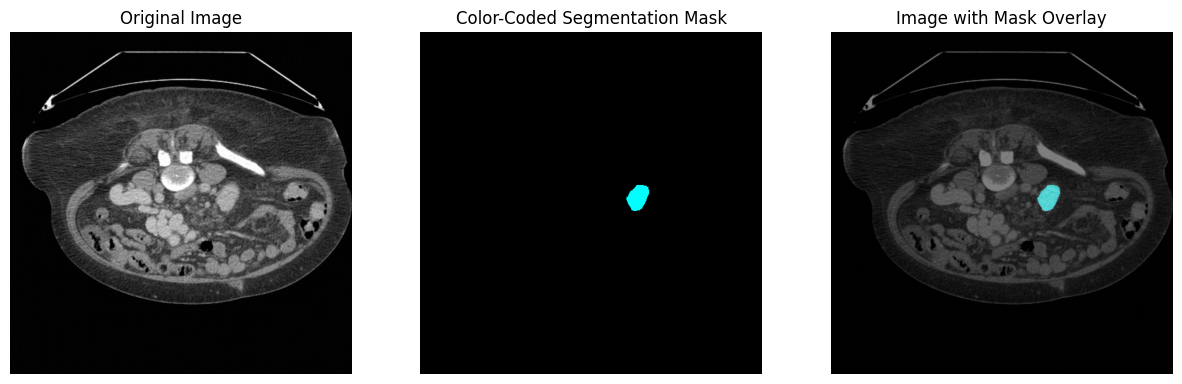

In [2]:
visualize_segmentation_from_image_paths(
    "data/train_images/01/2.png", "data/train_labels/01/2.png"
)

# Apply Preprocessing

In [3]:
help(apply_preprocessing_to_input_image)

Help on function apply_preprocessing_to_input_image in module src.data_processing.preprocessing:

apply_preprocessing_to_input_image(image: numpy.ndarray, original_spacing: Tuple[float, float], new_spacing: Tuple[float, float] = (0.9, 0.9), alpha: float = 1.5, beta: int = 20, target_size: int = 512, background_value: int = 0) -> numpy.ndarray
    Apply resampling, contrast/brightness adjustment, and center crop or padding.
    
    Args:
        image (np.ndarray): Input image to preprocess.
        original_spacing (Tuple[float, float]): Original pixel spacing.
        new_spacing (Tuple[float, float]): New pixel spacing for resampling.
        alpha (float): Contrast factor (> 1 increases contrast).
        beta (int): Brightness factor (positive increases brightness).
        target_size (int): Target size for height and width after cropping or padding.
        background_value (int): Value used for padding if the image is smaller.
    
    Returns:
        np.ndarray: Preprocessed 

In [4]:
help(apply_preprocessing_to_label_mask)

Help on function apply_preprocessing_to_label_mask in module src.data_processing.preprocessing:

apply_preprocessing_to_label_mask(labels: numpy.ndarray, original_spacing: Tuple[float, float] = (1.0, 1.0), new_spacing: Tuple[float, float] = (0.9, 0.9), target_size: int = 512, background_value: int = 0) -> numpy.ndarray
    Apply resampling and center crop or padding to label image mask.
    
    Args:
        labels (np.ndarray): Input label image to preprocess.
        original_spacing (Tuple[float, float]): Original pixel spacing.
        new_spacing (Tuple[float, float]): New pixel spacing for resampling.
        target_size (int): Target size for height and width after cropping or padding.
        background_value (int): Value used for padding if the label image is smaller.
    
    Returns:
        np.ndarray: Preprocessed label image.



In [5]:
import cv2

image = cv2.imread("data/train_images/01/2.png")
mask = cv2.imread("data/train_labels/01/2.png", cv2.IMREAD_GRAYSCALE)

new_image = apply_preprocessing_to_input_image(
    image, (0.9765620231628418, 0.9765620231628418)
)
new_mask = apply_preprocessing_to_label_mask(
    mask, (0.9765620231628418, 0.9765620231628418)
)

Unique labels in the segmentation mask and their corresponding organs:
Label 0: Background
Label 8: Left Kidney


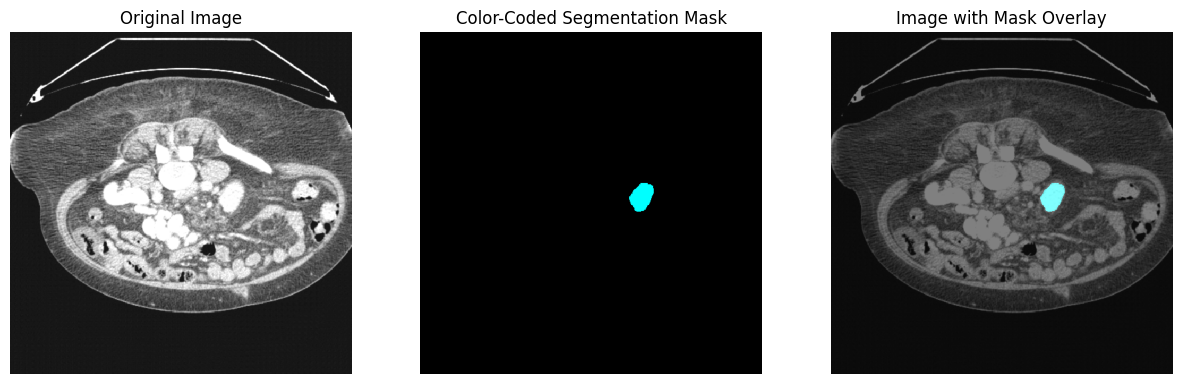

In [6]:
visualize_segmentation_from_numpy_arrays(new_image, new_mask)